In [98]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"

import sys
sys.path.append("../src/")

from utils import *

import warnings
warnings.filterwarnings("ignore")

In [257]:
bnd = gpd.read_file(
    "../data/BND_ADM_DONG_PG/BND_ADM_DONG_PG.shp", 
    encoding="cp949"
    )

bnd = bnd[bnd["ADM_CD"].apply(lambda x: str(x)[0:2] == "38")]
bnd["ADM_CD"] = bnd["ADM_CD"].astype(str)
bnd["SGG_CD"] = bnd["ADM_CD"].apply(lambda x: x[0:5])

sgg_cd = [{
    "창원시 성산구" : '38112',
    "의령군" : '38510', 
    "창녕군" : '38530', 
    "고성군" : '38540', 
    "남해군" : '38550', 
    "하동군" : '38560', 
    "산청군" : '38570',
    "거창군" : '38590', 
    "합천군" : '38600', 
    "사천시" : '38060', 
    "양산시" : '38100', 
    "거제시" : '38090', 
    "김해시" : '38070', 
    "밀양시" : '38080',
    "창원시 진해구" : '38115', 
    "함양군" : '38580', 
    "창원시 의창구" : '38111', 
    "창원시 마산합포구" : '38113', 
    "창원시 마산회원구" : '38114', 
    "진주시" : '38030', 
    "통영시" : '38050',
    "함안군" : '38520'
    }]

sgg_cd = pd.DataFrame(sgg_cd).T.reset_index().rename(columns={"index" : "시군구명", 0 : "SGG_CD"})
bnd = pd.merge(bnd, sgg_cd, on="SGG_CD", how="left")
bnd = bnd.to_crs(crs="EPSG:5179")

In [261]:
bnd["시군구명"].value_counts()

시군구명
진주시          30
김해시          19
거제시          18
합천군          17
밀양시          16
창원시 마산합포구    15
통영시          15
고성군          14
창녕군          14
사천시          14
양산시          13
창원시 진해구      13
의령군          13
하동군          13
창원시 마산회원구    12
거창군          12
산청군          11
함양군          11
함안군          10
남해군          10
창원시 성산구       8
창원시 의창구       7
Name: count, dtype: int64

In [195]:
emd_ori = gpd.read_file(
    "../data/emd_20230729/emd.shp", 
    encoding="cp949"
    )

## 읍면동 경상남도 추출
emd_ori = emd_ori[emd_ori["EMD_CD"].apply(lambda x: x[:2] == "48")]

## crs값 설정
emd_ori = emd_ori.set_crs(crs="EPSG:5179")

## 지역 코드 변환된 데이터
emd = pd.read_csv("../data/emd_pop.csv")
emd["EMD_CD"] = emd["EMD_CD"].apply(lambda x: str(x)[0:8])

emd = pd.merge(emd_ori[["EMD_CD", "geometry"]], emd[["EMD_CD", "EMD_KOR_NM"]], on="EMD_CD", how="left")
emd = emd.dissolve(by='EMD_KOR_NM')
emd["SGG_CD"] = emd["EMD_CD"].apply(lambda x: x[0:4])

In [194]:
import PublicDataReader as pdr
연결정보 = pdr.code_hdong_bdong()
list_data = ["창원시", "거제시", "김해시", "양산시", "진주시", "함양군", "거창군", "합천군", "사천시", "하동군", "밀양시", "통영시", "마산", "함안군", "창녕군", "진해", "의령군","남해군", "고성군"]
연결정보_gn = 연결정보[연결정보[["시군구코드", "시군구명"]].apply(lambda x: True if x["시군구명"] in list_data else False, axis=1)]
연결정보_gn = 연결정보_gn[연결정보_gn[["시군구코드", "시군구명"]].apply(lambda x: True if str(x["시군구코드"])[0:2] == "48" else False, axis=1)]

sgg_code = 연결정보_gn[["시군구코드", "시군구명"]].drop_duplicates()
sgg_code = sgg_code.rename(columns={"시군구코드" : "SGG_CD"})
sgg_code["SGG_CD"] = sgg_code["SGG_CD"].apply(lambda x: x[0:4])

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2024.2.1. 시행)


In [205]:
emd = emd.reset_index()
emd_sgg = pd.merge(emd, sgg_code, on="SGG_CD", how="left")

In [208]:
emd_sgg[emd_sgg["시군구명"] == "창원시"]

,EMD_KOR_NM,geometry,EMD_CD,SGG_CD,시군구명
5,가음정동,"POLYGON ((1108897.336 1691579.742, 1108899.025...",48123131,4812,창원시
7,가포동,"POLYGON ((1098595.433 1685901.957, 1098632.403...",48125101,4812,창원시
26,교방동,"POLYGON ((1097739.763 1691667.204, 1097753.499...",48125103,4812,창원시
28,구산면,"MULTIPOLYGON (((1096202.218 1675367.194, 10961...",48125310,4812,창원시
29,구암1동,"MULTIPOLYGON (((1100265.165 1695022.771, 11002...",48127101,4812,창원시
47,내서읍,"POLYGON ((1096197.606 1698466.405, 1096230.623...",48127250,4812,창원시
58,대산면,"MULTIPOLYGON (((1108062.883 1709733.825, 11081...",48121320,4812,창원시
66,덕산동,"POLYGON ((1109759.153 1683910.705, 1109756.569...",48129144,4812,창원시
75,동읍,"POLYGON ((1106318.094 1709713.679, 1106332.552...",48121250,4812,창원시
81,명곡동,"POLYGON ((1104195.399 1694250.114, 1104193.756...",48121114,4812,창원시


In [201]:
emd_sgg["시군구명"].value_counts()

시군구명
창원시    46
진주시    28
김해시    19
거제시    18
합천군    17
사천시    15
밀양시    14
창녕군    14
고성군    14
통영시    14
하동군    13
의령군    13
거창군    12
함양군    11
양산시    11
남해군    10
함안군     9
Name: count, dtype: int64

In [123]:
## 노인 중심점 데이터
silver_index = pd.read_csv(
    filepath_or_buffer="../data/silver_index.csv"
)
threshold = silver_index["total_idx"].quantile(0.20)
silver_index_bot20 = silver_index[silver_index["total_idx"] <= threshold]
silver = pd.read_csv(
    filepath_or_buffer="../data/silver.csv"
).rename(columns={"gid" : "격자이름"})
silver_index_bot20 = pd.merge(left=silver_index_bot20[["격자이름", "total_idx"]], right=silver[["격자이름", "경도", "위도"]], on="격자이름", how="left")
silver_index_bot20 = gpd.GeoDataFrame(silver_index_bot20, geometry=gpd.points_from_xy(silver_index_bot20['경도'], silver_index_bot20['위도']))
silver_index_bot20 = silver_index_bot20.set_crs(crs="EPSG:4326")
silver_index_bot20 = silver_index_bot20.to_crs(epsg=5179)
print(silver_index_bot20.crs)

EPSG:5179


In [124]:
## 시설 위치 데이터
facility_index = pd.read_csv(
    filepath_or_buffer="../data/facility_index.csv"
)
threshold = facility_index["total_idx"].quantile(0.20)
facility_index_bot20 = facility_index[facility_index["total_idx"] <= threshold]

facility = pd.read_csv(
    filepath_or_buffer="../data/facility.csv"
)
facility_index_bot20 = pd.merge(left=facility_index_bot20[["시설명", "total_idx"]], right=facility[["시설명", "경도", "위도"]], on="시설명", how="left")
facility_index_bot20 = gpd.GeoDataFrame(facility_index_bot20, geometry=gpd.points_from_xy(facility_index_bot20['경도'], facility_index_bot20['위도']))
facility_index_bot20 = facility_index_bot20.set_crs(crs="EPSG:4326")
facility_index_bot20 = facility_index_bot20.to_crs(epsg=5179)
print(facility_index_bot20.crs)

EPSG:5179


In [125]:
## 버스 정류장 위치 데이터
busstop = pd.read_csv(
    filepath_or_buffer="../data/busstop_act.csv", 
)

## geo data 형태로 변형
busstop = gpd.GeoDataFrame(
    busstop, 
    geometry=gpd.points_from_xy(busstop['경도'], busstop['위도'])
    )

## crs값 설정
busstop = busstop.set_crs(crs="EPSG:4326")
busstop = busstop.to_crs(epsg=5179)

### 하위 20% 지역 확인

In [127]:
silver_index_bot20_within_emd

,격자이름,total_idx,경도,위도,geometry,EMD_KOR_NM
0,라라886488,0.000000,128.469477,34.830412,POINT (1088650 1648850),둔덕면
1,마라032361,0.000268,128.627558,34.714531,POINT (1103250 1636150),남부면
2,라라986500,0.000000,128.578962,34.840310,POINT (1098650 1650050),거제면
3,마라026687,0.000000,128.625003,35.008510,POINT (1102650 1668750),하청면
4,마라066391,0.001098,128.665062,34.741230,POINT (1106650 1639150),남부면
...,...,...,...,...,...,...
5325,라마549407,0.000465,128.107103,35.661413,POINT (1054950 1740750),묘산면
5326,라마735387,0.000000,128.312402,35.642171,POINT (1073550 1738750),덕곡면
5327,라마664324,0.000030,128.233466,35.585875,POINT (1066450 1732450),율곡면
5328,라마710315,0.000225,128.284157,35.577441,POINT (1071050 1731550),쌍책면


In [129]:
## 노인 중심점 데이터
silver_index_bot20_within_emd = gpd.sjoin(silver_index_bot20, emd, how='inner', predicate='within')
silver_counts = silver_index_bot20_within_emd.groupby('EMD_KOR_NM').size()
emd['silver_count'] = silver_counts

# NaN 값은 0으로 대체
emd['silver_count'] = emd['silver_count'].fillna(0)

## 시설 위치 데이터
facility_index_bot20_within_emd = gpd.sjoin(facility_index_bot20, emd, how='inner', predicate='within')
facility_counts = facility_index_bot20_within_emd.groupby('EMD_KOR_NM').size()
emd['facility_count'] = facility_counts

# NaN 값은 0으로 대체
emd['facility_count'] = emd['facility_count'].fillna(0)

In [130]:
emd.sort_values(by="silver_count").head(20)

,geometry,silver_count,facility_count
EMD_KOR_NM,,,
가포동,"POLYGON ((1098595.433 1685901.957, 1098632.403...",0.0,0.0
가호동,"POLYGON ((1057385.646 1684686.886, 1057395.391...",0.0,0.0
하대동,"POLYGON ((1054462.96 1688645.147, 1054478.736 ...",0.0,6.0
가음정동,"POLYGON ((1108897.336 1691579.742, 1108899.025...",0.0,20.0
태백동,"POLYGON ((1107435.382 1687088.687, 1107464.011...",0.0,7.0
충무동,"MULTIPOLYGON (((1105469.775 1679516.69, 110547...",0.0,0.0
팔룡동,"MULTIPOLYGON (((1103059.756 1692322.379, 11030...",0.0,0.0
평산동,"MULTIPOLYGON (((1147002.003 1709353.818, 11470...",0.0,2.0
충무공동,"POLYGON ((1058199.2 1687787.358, 1058199.928 1...",0.0,0.0


In [131]:
emd.sort_values(by="facility_count").head(20)

,geometry,silver_count,facility_count
EMD_KOR_NM,,,
팔룡동,"MULTIPOLYGON (((1103059.756 1692322.379, 11030...",0.0,0.0
충무공동,"POLYGON ((1058199.2 1687787.358, 1058199.928 1...",0.0,0.0
차황면,"POLYGON ((1040797.352 1724951.425, 1040845.968...",0.0,0.0
자산동,"POLYGON ((1097096.108 1690893.558, 1097116.244...",0.0,0.0
충무동,"MULTIPOLYGON (((1105469.775 1679516.69, 110547...",0.0,0.0
풍호동,"MULTIPOLYGON (((1111195.597 1680743.381, 11111...",1.0,0.0
신등면,"POLYGON ((1043708.443 1717409.415, 1043819.711...",0.0,0.0
신안면,"POLYGON ((1042301.212 1710669.09, 1042341.081 ...",0.0,0.0
옥포2동,"POLYGON ((1109396.562 1659468.004, 1109416.543...",1.0,0.0


### 읍면동 별 포함된 수로 시각화

KeyError: 'silver_count'

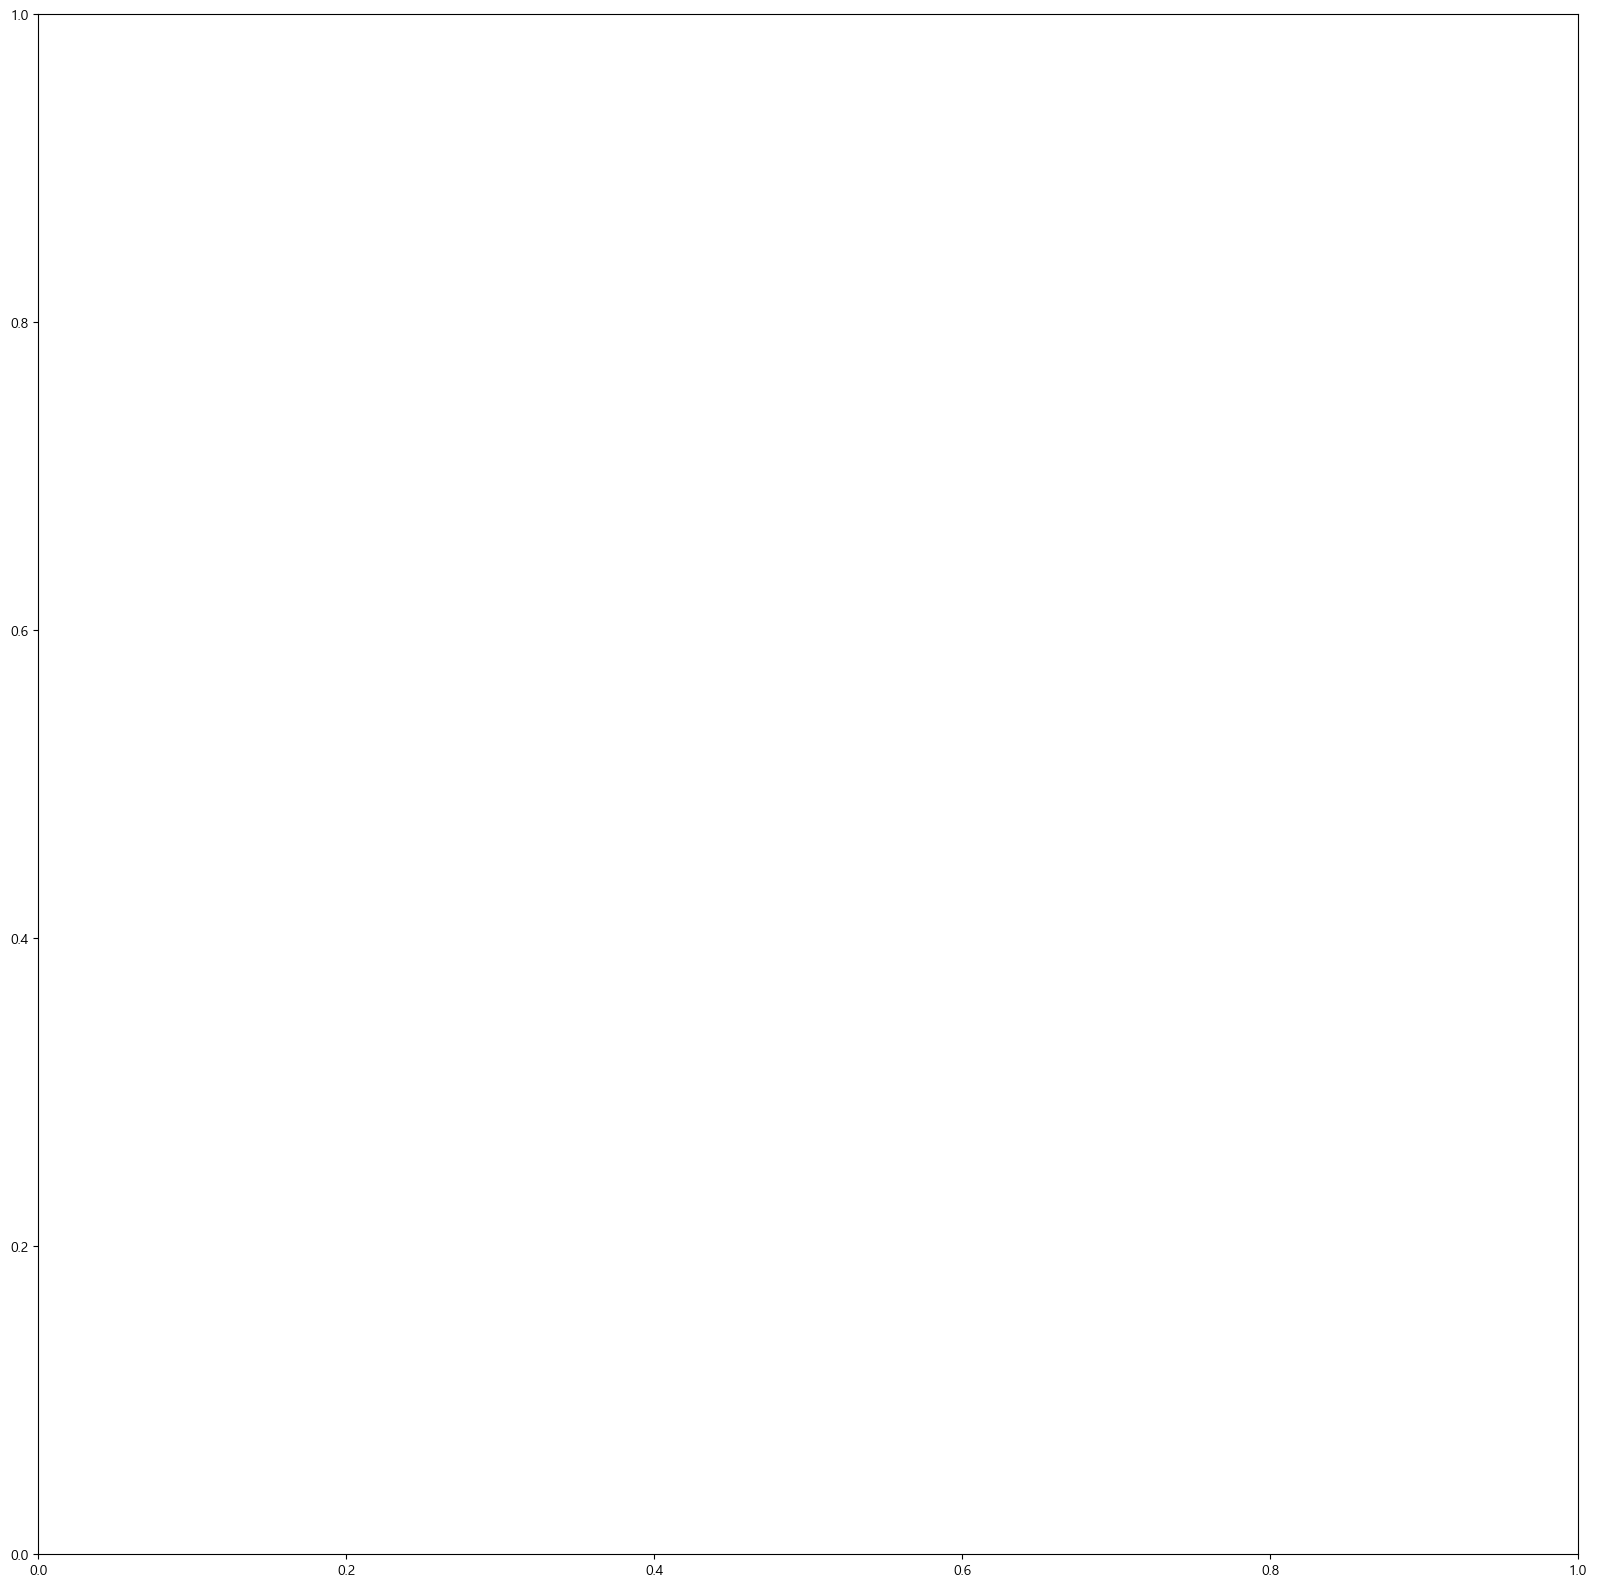

In [142]:
# 시각화
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# 읍면동 별 취약 지역 수를 컬러맵으로 시각화
emd.plot(column='silver_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black', linewidth=0.5)

# 검은색 배경 설정 (옵션)
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

plt.title('읍면동 별 노인 밀집 지역의 대중교통 취약 지역 수에 따른 시각화', color='white', fontsize=20)
plt.show()

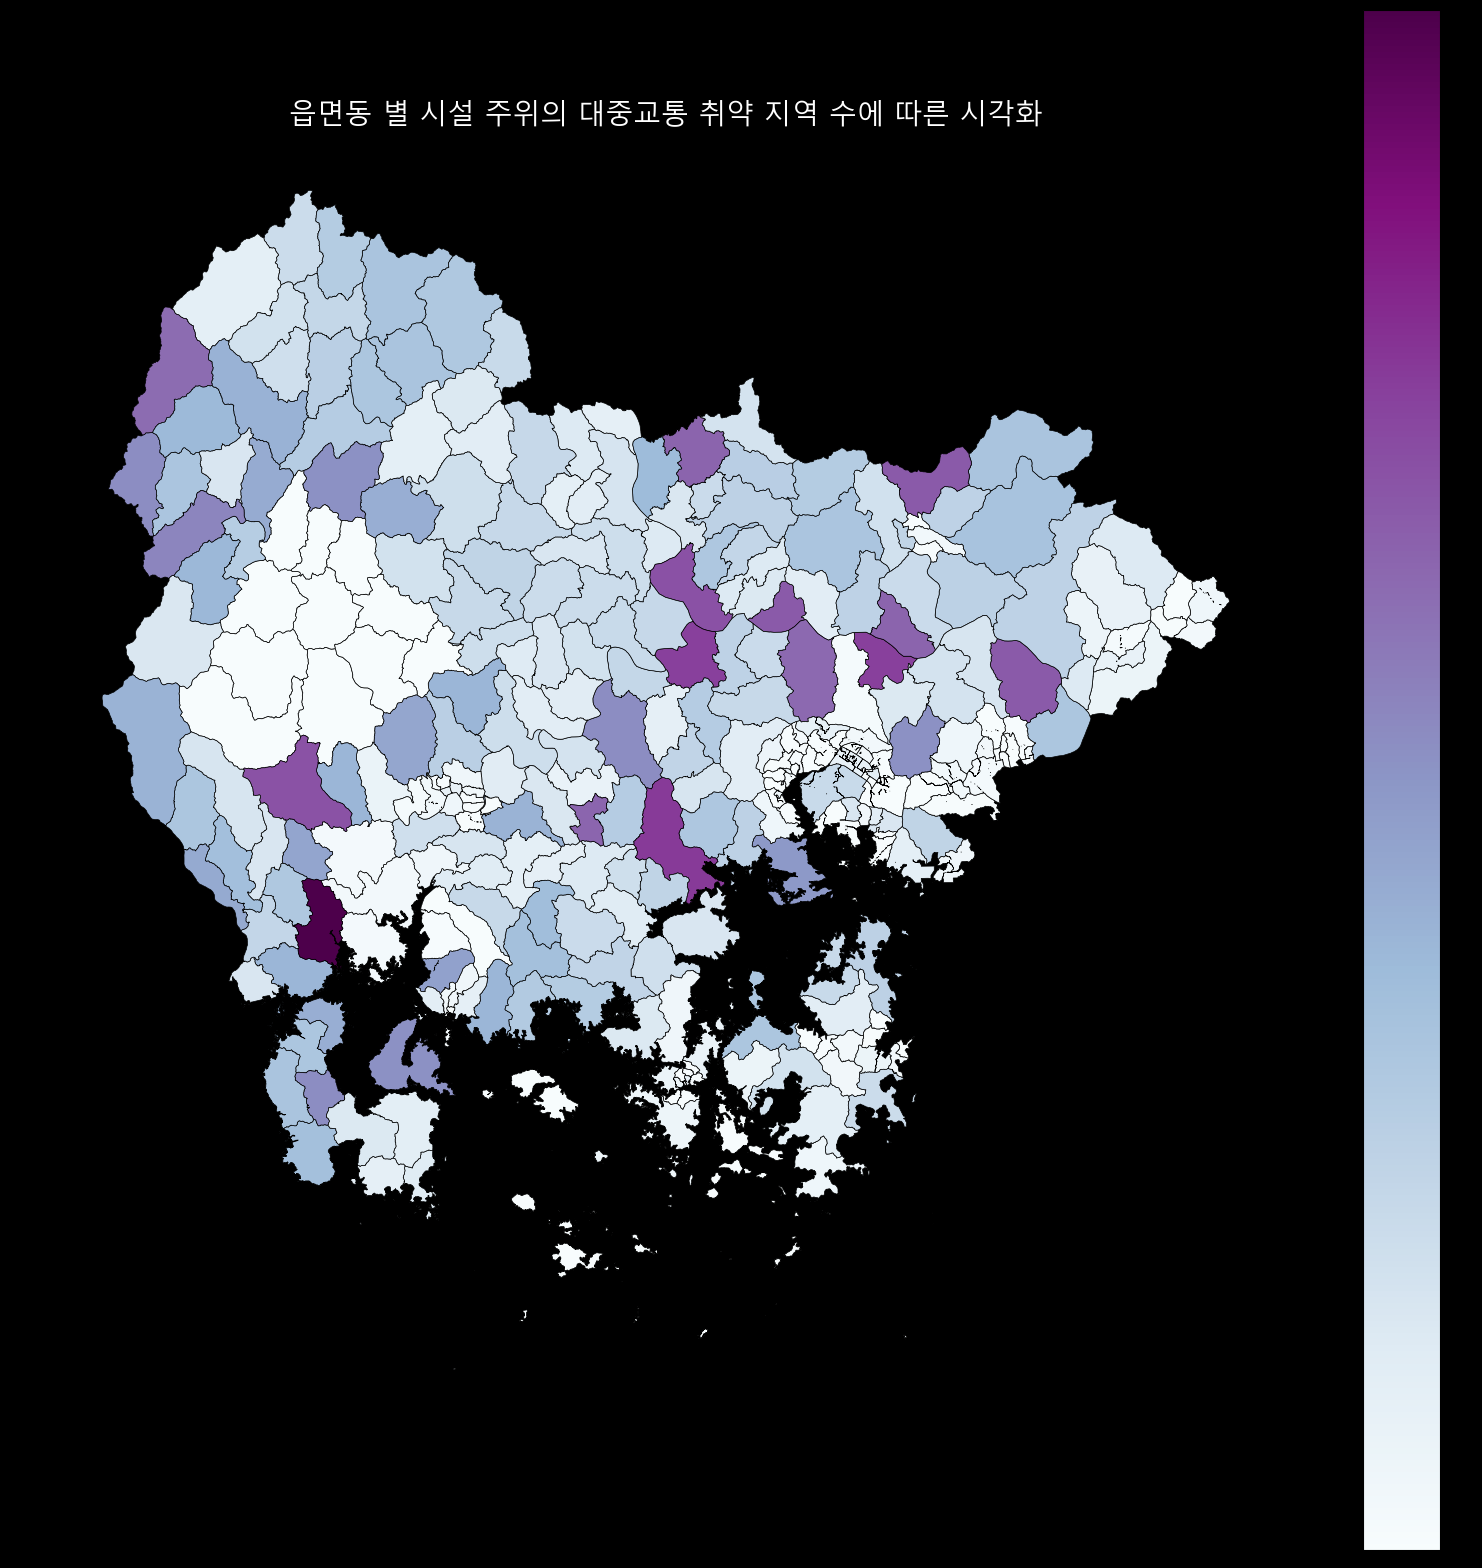

In [134]:
# 시각화
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# 읍면동 별 취약 지역 수를 컬러맵으로 시각화
emd.plot(column='facility_count', ax=ax, legend=True, cmap='BuPu', edgecolor='black', linewidth=0.5)

# 검은색 배경 설정 (옵션)
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

plt.title('읍면동 별 시설 주위의 대중교통 취약 지역 수에 따른 시각화', color='white', fontsize=20)
plt.show()